## Bibliotecas

In [ ]:
import pandas
import matplotlib.pyplot as plot
import seaborn as sns
import numpy

## Lendo os Dados

In [ ]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

### Adicionando coluna de nota total e armazenando notas maiores que 0 separadamente 

In [ ]:
tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_REDACAO']

dataset['NU_NOTA_TOTAL'] = dataset[tests].sum(axis=1)

students_without_zero_score = dataset.query('NU_NOTA_TOTAL != 0')

## Insights da Aula


Text(0, 0.5, 'Número de estudantes')

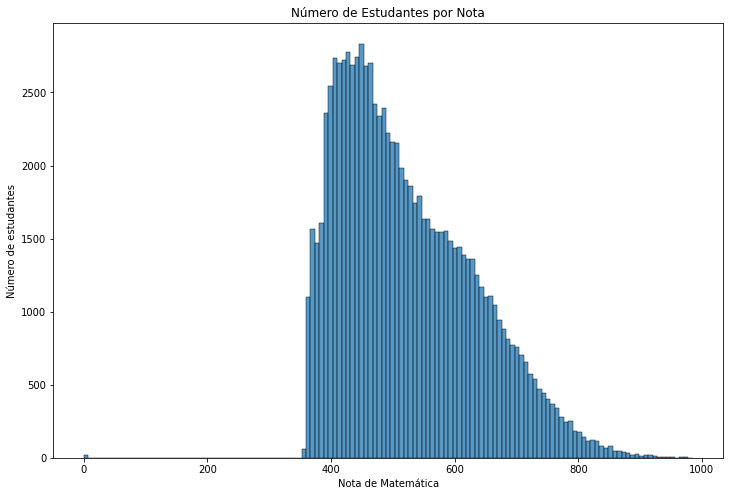

In [ ]:
plot.figure(figsize=(12,8))
sns.histplot(students_without_zero_score, x='NU_NOTA_MT')
plot.title('Número de Estudantes por Nota')
plot.xlabel('Nota de Matemática')
plot.ylabel('Número de estudantes')


Text(0, 0.5, 'Número de Estudantes')

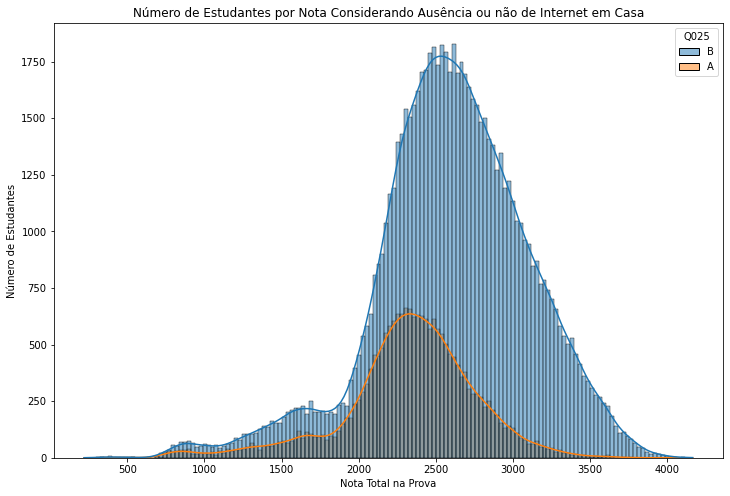

In [ ]:
plot.figure(figsize=(12,8))
sns.histplot(students_without_zero_score, x='NU_NOTA_TOTAL', hue="Q025", kde=True)
plot.title('Número de Estudantes por Nota Considerando Ausência ou não de Internet em Casa')
plot.xlabel('Nota Total na Prova')
plot.ylabel('Número de Estudantes')

Text(0, 0.5, 'Porcentagem de Estudantes')

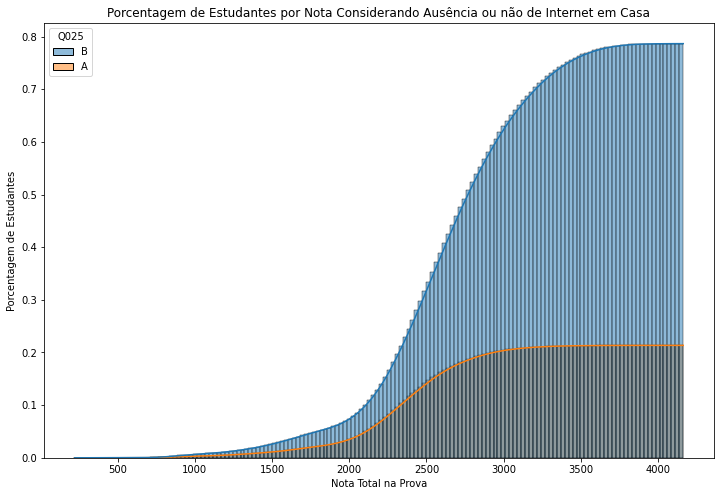

In [ ]:
plot.figure(figsize=(12,8))
sns.histplot(students_without_zero_score, x='NU_NOTA_TOTAL', hue="Q025", kde=True, stat='density', cumulative=True)
plot.title('Porcentagem de Estudantes por Nota Considerando Ausência ou não de Internet em Casa')
plot.xlabel('Nota Total na Prova')
plot.ylabel('Porcentagem de Estudantes')

Text(0, 0.5, 'Nota de Linguagen')

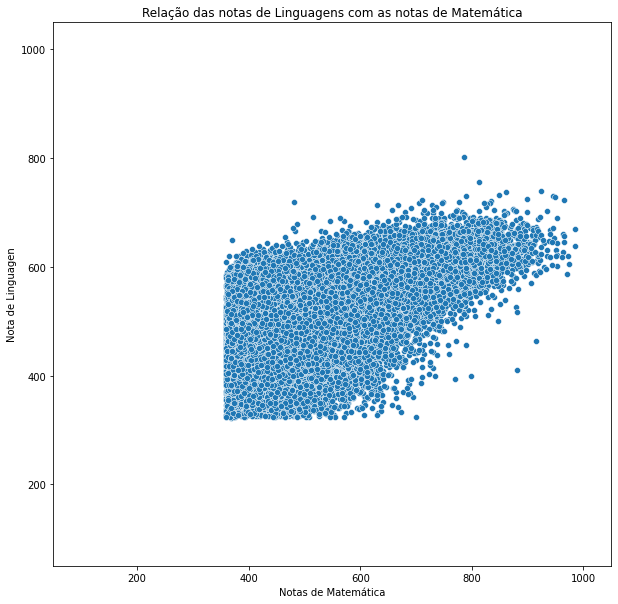

In [ ]:
plot.figure(figsize=(10,10))

sns.scatterplot(data=students_without_zero_score, x='NU_NOTA_MT', y='NU_NOTA_LC')
plot.xlim((50, 1050))
plot.ylim((50, 1050))
plot.title('Relação das notas de Linguagens com as notas de Matemática')
plot.xlabel('Notas de Matemática')
plot.ylabel('Nota de Linguagen')


<Figure size 1440x1440 with 0 Axes>

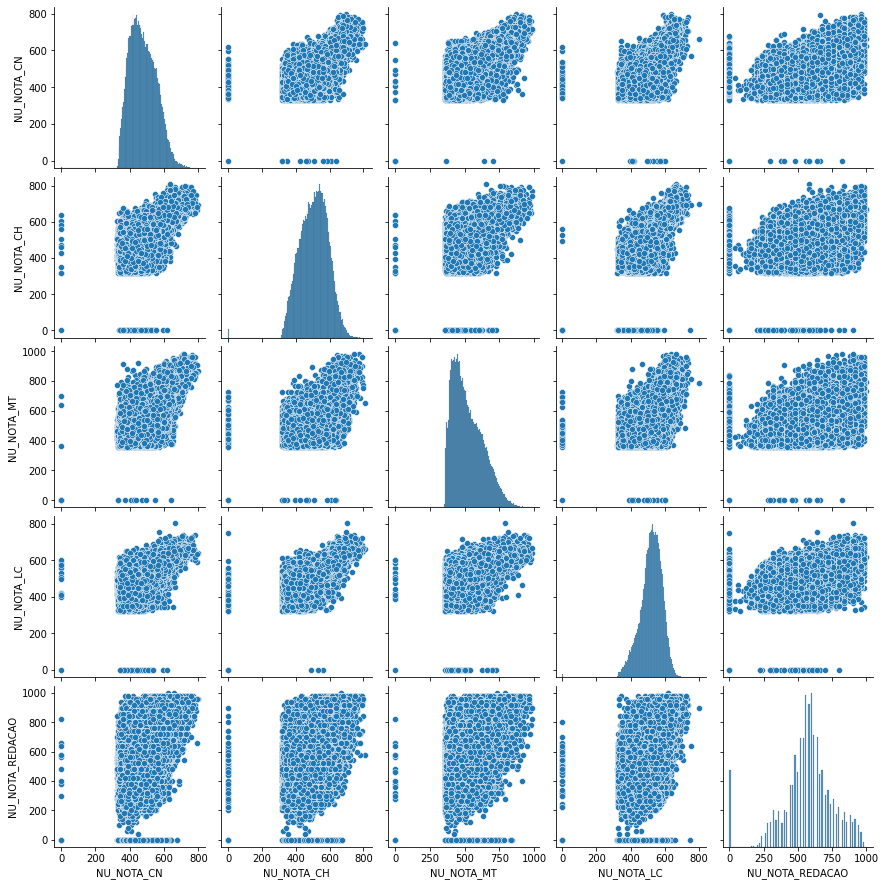

In [ ]:
plot.figure(figsize=(20,20))

sns.pairplot(students_without_zero_score[tests])

In [ ]:
correlation = students_without_zero_score[tests].corr()
correlation

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


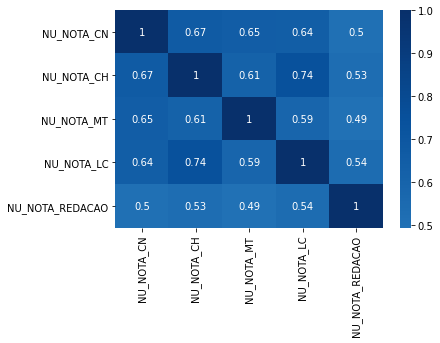

In [ ]:
sns.heatmap(correlation, cmap="Blues", center=0, annot=True)

## Desafio 1: Plotar média, mediana e moda nas notas de LC e MT

### Notas LC
Assimetria à esquerda


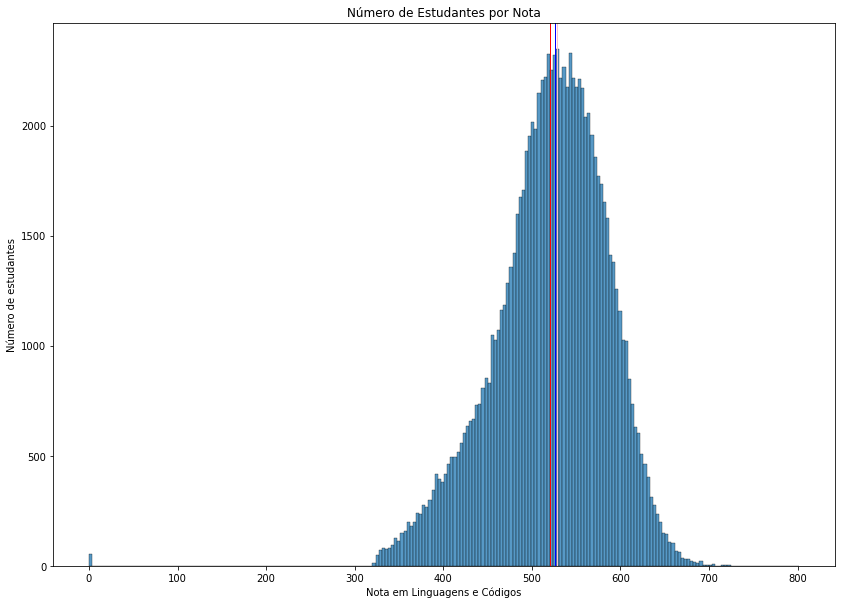

In [ ]:
plot.figure(figsize=(14,10))
sns.histplot(students_without_zero_score, x='NU_NOTA_LC')
plot.title('Número de Estudantes por Nota')
plot.xlabel('Nota em Linguagens e Códigos')
plot.ylabel('Número de estudantes')

plot.axvline(students_without_zero_score['NU_NOTA_LC'].mean(), color='red', linewidth=1)
plot.axvline(students_without_zero_score['NU_NOTA_LC'].median(), color='blue', linewidth=1)
plot.axvline(students_without_zero_score['NU_NOTA_LC'].mode()[0], color='pink', linewidth=1)

### Notas Matemática
Assimetria à direita

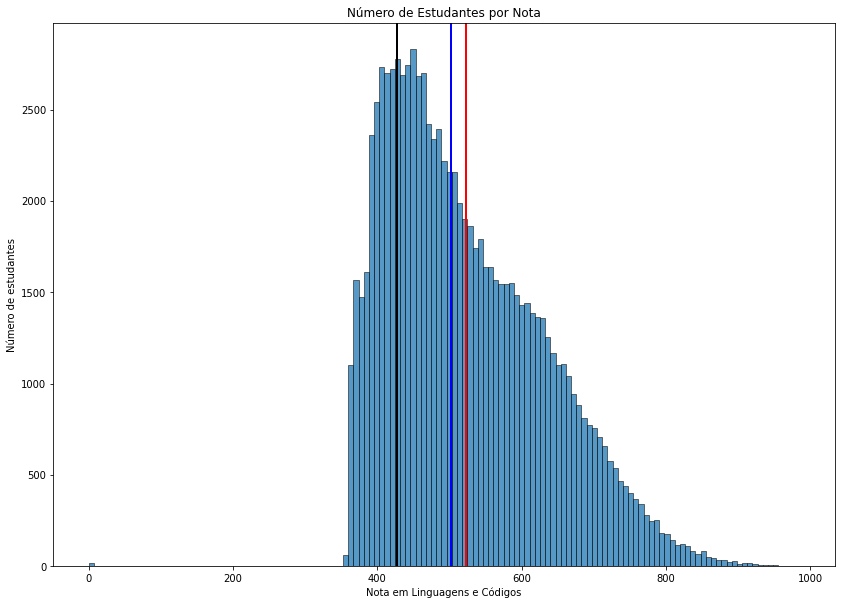

In [ ]:
plot.figure(figsize=(14,10))
sns.histplot(students_without_zero_score, x='NU_NOTA_MT')
plot.title('Número de Estudantes por Nota')
plot.xlabel('Nota em Linguagens e Códigos')
plot.ylabel('Número de estudantes')

plot.axvline(students_without_zero_score['NU_NOTA_MT'].mean(), color='red', linewidth=2)
plot.axvline(students_without_zero_score['NU_NOTA_MT'].median(), color='blue', linewidth=2)
plot.axvline(students_without_zero_score['NU_NOTA_MT'].mode()[0], color='black', linewidth=2)

## Desafio 2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente

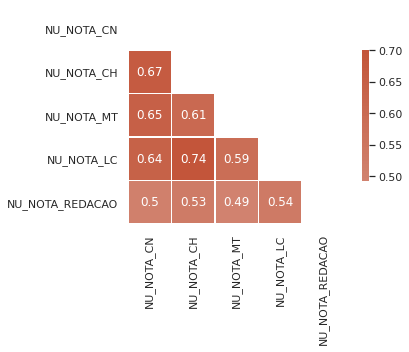

In [ ]:
pallete = sns.diverging_palette(200, 20, as_cmap=True)
sns.set_theme(style="white")

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, 
            cmap=pallete,
            mask=mask, 
            vmax=0.7, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6}, 
            annot=True)

## Desafio 3: Filtrar as notas pelo estado e comparar com as do Brasil inteiro 

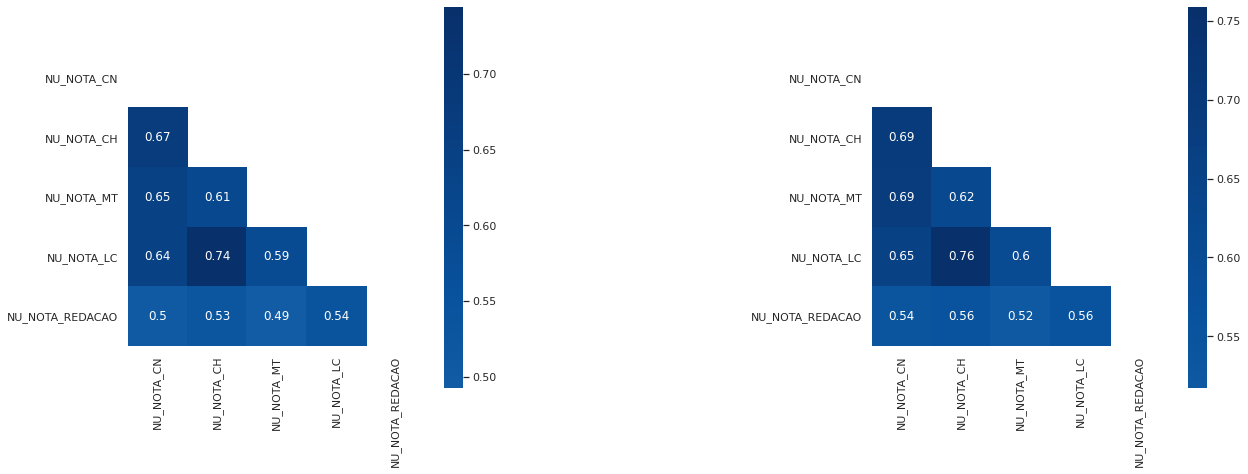

In [ ]:
state_correlation = students_without_zero_score.query('SG_UF_RESIDENCIA == "SP"')[tests].corr()

figure, ax = plot.subplots(1,2)
plot.subplots_adjust(wspace = 1)
figure.set_figheight(10)
figure.set_figwidth(20)


sns.heatmap(correlation, mask = mask, cmap="Blues", center=0,square=True, annot=True, cbar_kws={"shrink": .7}, ax=ax[0])
sns.heatmap(state_correlation, mask = mask,cmap="Blues", center=0,square=True, annot=True, cbar_kws={"shrink": .7}, ax=ax[1])